In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.drop(columns = ['RowNumber' , 'CustomerId'] , inplace = True)

In [9]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df['Surname'].value_counts()

,count
Surname,
Smith,32
Scott,29
Martin,29
Walker,28
Brown,26
...,...
Izmailov,1
Bold,1
Bonham,1


In [11]:
temp = df.groupby(['Surname' , 'Exited'])[['Surname' , 'Exited']].value_counts().reset_index()

temp[temp['Exited'] == 1].describe()

,Exited,count
count,1188.0,1188.000000
mean,1.0,1.714646
std,0.0,1.231524
min,1.0,1.000000
25%,1.0,1.000000
50%,1.0,1.000000
75%,1.0,2.000000
max,1.0,9.000000


In [12]:
temp[temp['Exited'] == 0].describe()

,Exited,count
count,2616.0,2616.00000
mean,0.0,3.04396
std,0.0,3.60401
min,0.0,1.00000
25%,0.0,1.00000
50%,0.0,1.00000
75%,0.0,3.00000
max,0.0,26.00000


Surname column can be a important column but after applying one hot endcoding this will convert it into vary large dimension so , ignoring this time

In [13]:
df.drop(columns = ['Surname'] , inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Exited', ylabel='CreditScore'>

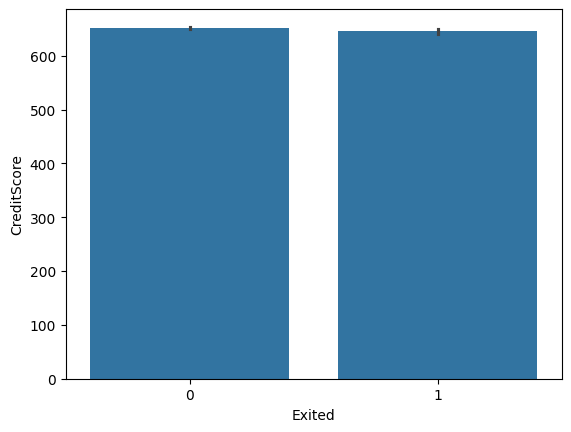

In [14]:
# it will take too much time to run
sns.barplot(data = df , x = 'Exited' , y = 'CreditScore')

<Axes: xlabel='Exited', ylabel='Gender'>

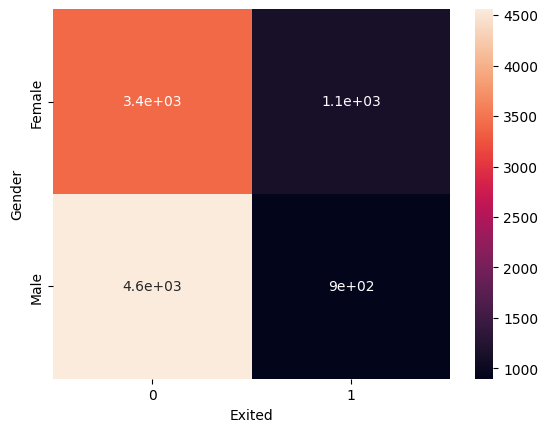

In [15]:
sns.heatmap(pd.crosstab(df['Gender'] , df['Exited']) , annot = True  )

In [16]:
pd.crosstab(df['Gender'] , df['Exited'])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [17]:
pd.crosstab(df['Geography'] , df['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Axes: xlabel='Exited', ylabel='Age'>

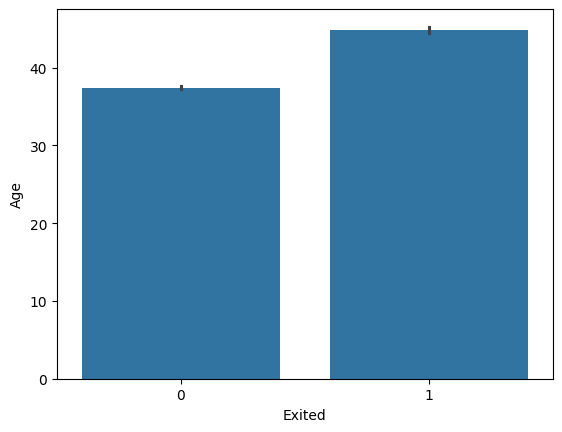

In [18]:
sns.barplot(x='Exited', y='Age', data=df, estimator='mean')

<Axes: xlabel='Exited', ylabel='Balance'>

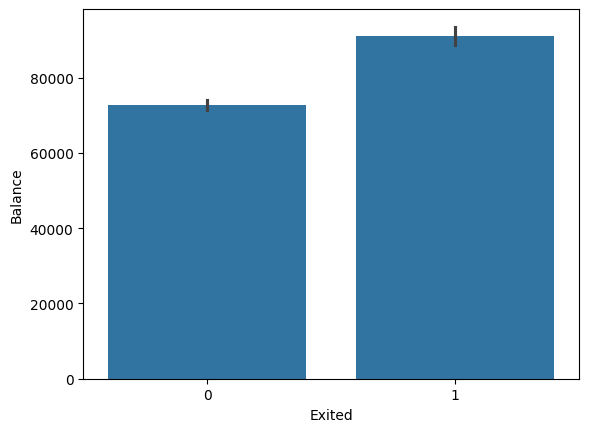

In [19]:
sns.barplot(x='Exited', y='Balance', data=df, estimator='mean')

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

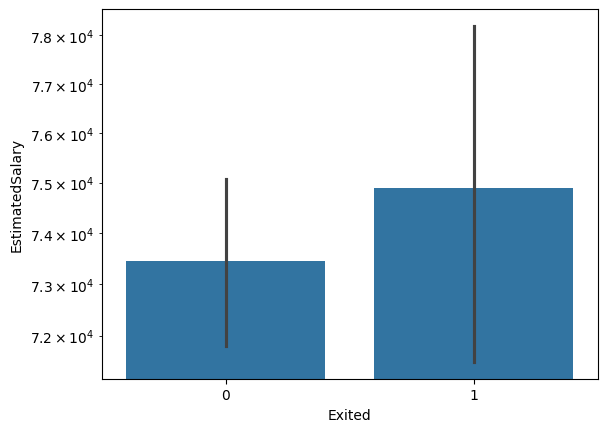

In [20]:
sns.barplot(x='Exited', y='EstimatedSalary', data=df, estimator='mean' , log = True)

<Axes: xlabel='Exited', ylabel='Tenure'>

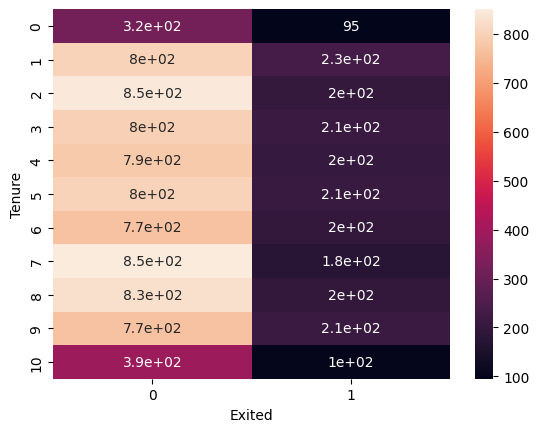

In [21]:
sns.heatmap(pd.crosstab(df['Tenure'] , df['Exited']) , annot = True  )

<Axes: xlabel='Exited', ylabel='NumOfProducts'>

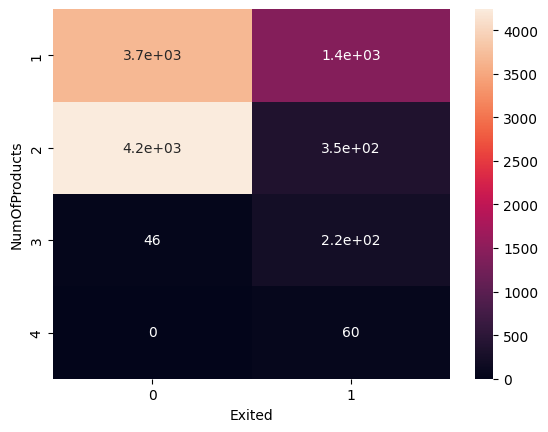

In [22]:
sns.heatmap(pd.crosstab(df['NumOfProducts'] , df['Exited']) , annot = True  )

<Axes: xlabel='Exited', ylabel='HasCrCard'>

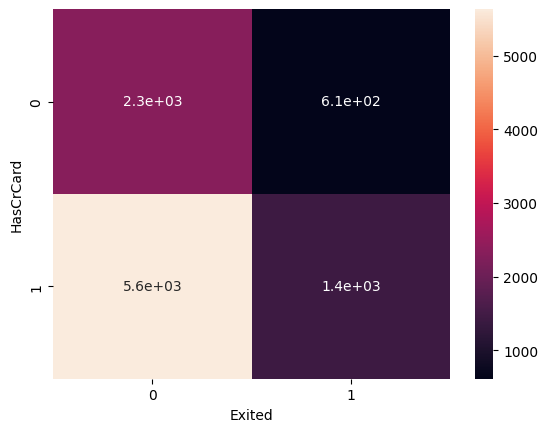

In [23]:
sns.heatmap(pd.crosstab(df['HasCrCard'] , df['Exited']) , annot = True  )

<Axes: xlabel='Exited', ylabel='IsActiveMember'>

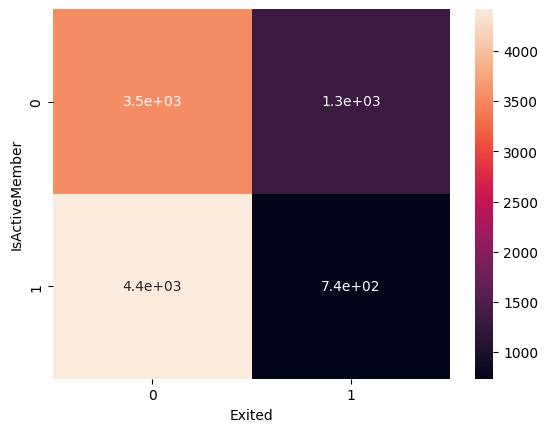

In [24]:
sns.heatmap(pd.crosstab(df['IsActiveMember'] , df['Exited']) , annot = True  )

# model building

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df = pd.get_dummies(df , columns = ['Geography' , 'Gender'] , drop_first=True , dtype = int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [27]:
x = df.drop(columns = ['Exited'])
y = df['Exited']

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.2 , random_state = 42)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [30]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

ANN(Ariticial Neural Network) model

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(11, activation = 'relu' , input_dim = 11))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224 (896.00 B)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss= 'binary_crossentropy' , optimizer= 'Adam', metrics=['accuracy'] )

In [35]:
history = model.fit(x_train_scaled , y_train , epochs=25 , validation_split=0.2 )

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5387 - loss: 0.6850 - val_accuracy: 0.8012 - val_loss: 0.5365
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7926 - loss: 0.5178 - val_accuracy: 0.8056 - val_loss: 0.4600
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8054 - loss: 0.4536 - val_accuracy: 0.8056 - val_loss: 0.4398
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8046 - loss: 0.4459 - val_accuracy: 0.8081 - val_loss: 0.4283
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8178 - loss: 0.4282 - val_accuracy: 0.8200 - val_loss: 0.4190
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8165 - loss: 0.4235 - val_accuracy: 0.8313 - val_loss: 0.4105
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8335 - loss: 0.4051 - val_accuracy: 0.8344 - val_loss: 0.4038
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.4114 - val_accuracy: 0.

In [36]:
history.history

{'accuracy': [0.6820312738418579,
  0.7951562404632568,
  0.8010937571525574,
  0.8073437213897705,
  0.8159375190734863,
  0.8231250047683716,
  0.8290625214576721,
  0.835156261920929,
  0.8392187356948853,
  0.8407812714576721,
  0.8479687571525574,
  0.8501562476158142,
  0.8568750023841858,
  0.8571875095367432,
  0.8595312237739563,
  0.8607812523841858,
  0.860156238079071,
  0.8623437285423279,
  0.8620312213897705,
  0.8631250262260437,
  0.8626562356948853,
  0.8629687428474426,
  0.8651562333106995,
  0.8615624904632568,
  0.8628125190734863],
 'loss': [0.6317498087882996,
  0.49867942929267883,
  0.4582322835922241,
  0.4415092170238495,
  0.4293138384819031,
  0.4196593761444092,
  0.4115270674228668,
  0.4030715525150299,
  0.39433425664901733,
  0.3854737877845764,
  0.37606459856033325,
  0.3662572205066681,
  0.3579072654247284,
  0.3509480655193329,
  0.34653788805007935,
  0.34279632568359375,
  0.3406459093093872,
  0.33854007720947266,
  0.33732113242149353,
  0.33

In [37]:
model.get_weights()

[array([[ 6.90642521e-02,  5.00291646e-01,  1.62070379e-01,
         -2.03328639e-01, -2.91143488e-02, -2.77021497e-01,
         -1.26432702e-01,  3.58059764e-01, -1.49377342e-03,
         -4.55710918e-01, -2.85480334e-03],
        [-1.82346553e-01, -1.55286774e-01,  2.81909406e-01,
          8.76263142e-01, -4.40377146e-01,  4.86705631e-01,
         -5.15775204e-01, -6.87292039e-01,  7.94674635e-01,
         -1.67955384e-01, -5.21894276e-01],
        [ 2.35940218e-01,  3.07813376e-01,  2.92229265e-01,
         -1.76855445e-01, -2.90023386e-01, -1.02566339e-01,
          2.24692971e-01,  2.16493636e-01,  1.13530874e-01,
          1.90972209e-01, -1.97426662e-01],
        [ 3.15630019e-01, -2.78886378e-01, -5.36208153e-01,
         -9.10828412e-02,  2.67289400e-01, -4.68103170e-01,
         -8.01355839e-02, -1.53579980e-01,  3.70563865e-02,
         -8.59151602e-01,  9.16236043e-02],
        [ 1.03289366e+00,  7.48303652e-01, -9.17691708e-01,
         -9.43881646e-02, -3.23008329e-01,  

layer 0 weights --> 33   
layer 0 bias  ----> 3  
layer 1 weights --> 3  
layer 1 bias -----> 1  

In [38]:
# it is return values between 0 to 1 due to sigmoid  loss function
model.predict(x_test_scaled[0].reshape(-1,11))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.03230699]], dtype=float32)

In [39]:
y_test.iloc[0]

0

In [40]:
# so take a threshold value 0.5 , if greater then 0.5 means 1 else 0

np.where(model.predict(x_test_scaled[0].reshape(-1,11)) > 0.5 , 1 , 0 )[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


0

Right prediction

In [41]:
y_pred_prob = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [42]:
y_pred = np.where(y_pred_prob > 0.5 , 1 , 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

Text(0, 0.5, 'Accuracy')

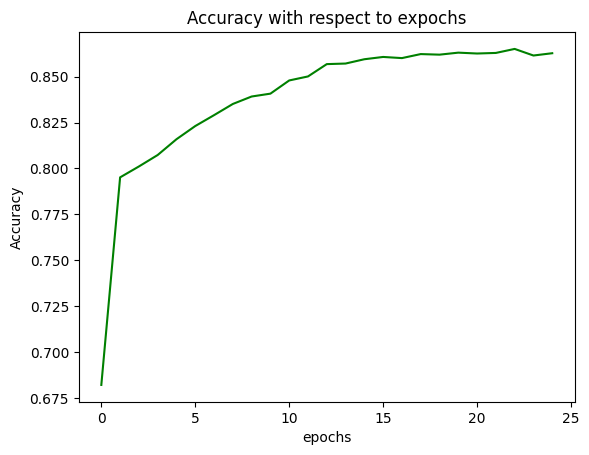

In [66]:
plt.plot(history.history['accuracy'] , c = 'Green')
plt.title('Accuracy with respect to expochs')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [44]:
accuracy_score(y_test , y_pred)

0.861

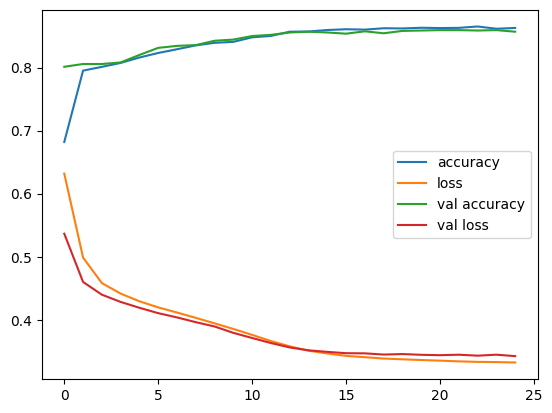

In [45]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['loss'] , label = 'loss')
plt.plot(history.history['val_accuracy'] , label = 'val accuracy')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.legend()

# pickling model

In [46]:
import pickle

pickle.dump(model , open('model.pkl' , 'wb'))
pickle.dump(scale , open('scale.pkl' , 'wb'))